In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

%matplotlib inline

In [18]:
df = pd.read_csv("sonnett.csv").sample(frac=.1)

In [19]:
df['is_reverse'] = df['is_reverse'].apply(lambda x: int(x))

In [20]:
df['target'] = df['is_reverse']

In [37]:
features = df.columns[5:-1]

In [55]:
df.describe()

,is_reverse,percent_of_ions_matched,Total Ions,Obs m/z,z,PPM,XCorr,delta_xcorr,relative_elution_time,pep_len,has_oxidized_met,num_missed_cleavages,Sp,unique_delta_expect,Expect,Expect.1,target
count,53670.000000,53670.000000,53670.000000,53670.000000,53670.0,53670.000000,53670.000000,53670.000000,53670.000000,53670.000000,53670.00000,53670.000000,53670.000000,53670.000000,53670.000000,5.367000e+04,53670.000000
mean,0.227483,0.491350,22.871362,903.830398,2.0,-6.254130,1.824840,0.285259,0.545175,12.435681,0.16989,0.269834,286.685819,0.284131,7.410694,6.510515e+00,0.227483
std,0.419211,0.300066,8.308917,225.547271,0.0,856.557366,1.068803,0.244952,0.276287,4.154459,0.37554,0.488940,346.557851,0.245393,3.924639,4.259020e+01,0.419211
min,0.000000,0.000000,10.000000,500.217230,2.0,-2491.930000,0.000000,0.000000,0.000111,6.000000,0.00000,0.000000,0.000000,0.000000,2.000000,9.600000e-26,0.000000
25%,0.000000,0.222222,16.000000,717.460015,2.0,-23.775000,1.003000,0.053000,0.310257,9.000000,0.00000,0.000000,36.400000,0.055000,4.298000,1.200000e-05,0.000000
50%,0.000000,0.437500,22.000000,879.004765,2.0,-1.245000,1.483000,0.214000,0.559507,12.000000,0.00000,0.000000,127.500000,0.207000,5.695000,2.000000e-01,0.000000
75%,0.000000,0.777778,28.000000,1079.511708,2.0,4.090000,2.588000,0.515000,0.783754,15.000000,0.00000,0.000000,442.300000,0.513000,9.917000,5.000000e+00,0.000000
max,1.000000,1.000000,62.000000,1399.759890,2.0,2505.050000,6.301000,1.000000,0.999889,32.000000,1.00000,2.000000,3296.800000,0.854000,30.019000,1.000000e+03,1.000000


In [101]:
# make df of just features and target
data = df[features]

In [102]:
# standardize data by subtracting mean and dividing by standard deviation

standardized_data = (data - data.mean()) / data.std()

In [103]:
data = pd.concat([standardized_data, df['target']], axis=1)

In [104]:
# 'melt' dataframe into one target column and one features column -- for boxplotting etc.
data = pd.melt(data,
               id_vars="target",
               var_name="features",
               value_name='value')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

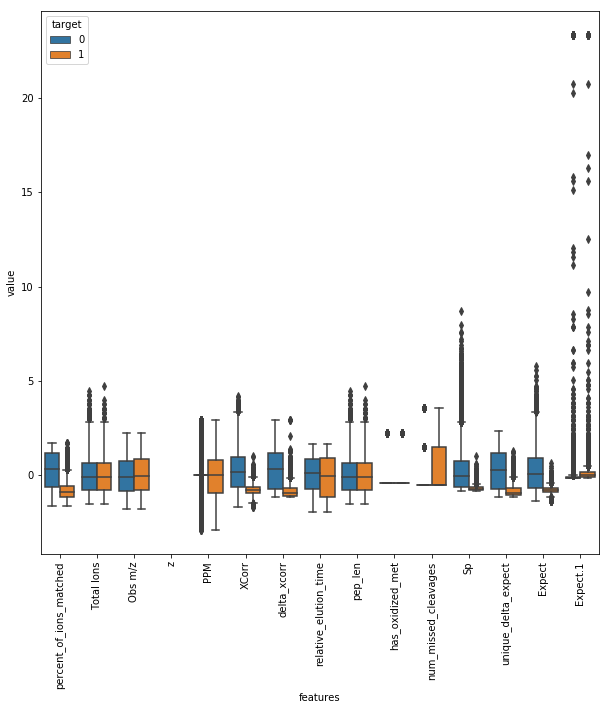

In [105]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="target", data=data)
plt.xticks(rotation=90)

In [23]:
X = df[features]
y = df['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [36]:
svm = svm.SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.76993590699060965

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.76665672976598598

In [ ]:
# make series of feature importance and plot

features = pd.Series(rfc.feature_importances_, # weights are the values in the series
                     index=df.columns[5:-1]) # feature names are the index, show up as labels on the plot

features = features.sort_values()

features.plot(kind='bar')

In [ ]:
df.plot.scatter(x='Total Ions', y = 'Obs m/z')
df.plot.scatter(x='Total Ions', y = 'z')
df.plot.scatter(x='Total Ions', y = 'PPM')
df.plot.scatter(x='Total Ions', y = 'pep_len')

In [ ]:
# plot by sepal length/width# plot b 

show_x = 'Sp'
show_y = 'Expect'

ax = df[df['target'] == 0].plot.scatter(x = show_x,
                                             y = show_y,
                                             color = '#7fc97f',
                                             label = 0)

In [ ]:
ax = df[df['target'] == 1].plot.scatter(x = show_x,
                                             y = show_y,
                                             color = '#beaed4',
                                             label = 0)

In [ ]:
sp = pd.Series(df['Sp'].values, index=df['target'])

In [ ]:
sp.iloc[:50]plot(kind='bar')

In [ ]:
df['Sp'].unique()

In [ ]:
df.groupby(['Sp'])['target'].count()

In [ ]:
df.groupby(['target'])['XCorr'].mean()

In [ ]:
df[df['target'] == 0].describe()

In [ ]:
df[df['target'] == 1].describe()

In [ ]:
df['target'].value_counts()